# Assignment 2
#### Adam Judge - 16343971

## Task 1 - Data Collection

In [387]:
import numpy as np
import urllib.request
import bs4
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd 
pd.set_option("display.max_rows", None)
import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from datetime import datetime, timedelta, date

In [38]:
def getParser(url):
    # Request url page
    response = urllib.request.urlopen(url)
    if response.code != 200:
        print("Bad response!")
    # Decode HTML
    html = response.read().decode()    
    # Setup parser of html
    parser = bs4.BeautifulSoup(html, "html.parser")
    return parser

### A list of URLs will be generated through the extraction of the number of pages per month

In [39]:
# Get all URLS with data
# All urls start with this
urlBase="http://mlg.ucd.ie/modules/COMP41680/assignment2/month-"
months=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
urls=[]
for m in months:
    url=urlBase + m + "-001.html"
    parser = getParser(url)
    # h4 field countains "Page 1 of X", extract X to obtain all urls with data
    for match in parser.find_all("h4"):
        text = match.get_text().split()
        # This will be the total number of pages to parse
        pagenum=int(text[-1])
    for num in range(1,pagenum+1):
        # Fit number into URL format
        if num<10:
            urls.append(urlBase+m+f"-00{num}.html")
        elif num<100:
            urls.append(urlBase+m+f"-0{num}.html")
        else:
            urls.append(urlBase+m+f"-{num}.html")

### Categories
##### The chosen categories for this assignment are Music, Sport, and US News. 
The titles, categories, and snippets will now be compiled into relevant lists

In [40]:
iter=0
# Categories of interest to the author
cats=["Music", "Sport", "US-News"]
# data[col][row]
# Multiclass array
dataAll=[]
# Arrays for binary
dataMusicSport=[]
dataMusicUSNews=[]
dataSportUSNews=[]
snippet=""
for u in urls:
    parser = getParser(u)
    titles=[]
    iter=0
    articleNum=0
    # Extract all titles on each URL
    for match in parser.find_all("h5"):
        # Split by non breaking space to extract titles
        titles.append(match.get_text().split("\xa0")[-1])
    # p field contains category, times, snippets
    for match in parser.find_all("p"):
        text = match.get_text()
        currCat=text.split()[-1]
        # If category of interest and actually a category
        # Avoids snippets ending in category name
        if text.split()[0] == "Category:":
            articleNum+=1
        if currCat in cats and len(text.split())==2:
            category=currCat
            iter=1
            continue
        if iter == 0:
            # Times not needed
            continue
        if iter == 1:
            # Append titles, snippets, and categories to list of lists
            dataAll.append([titles[articleNum-1],text, category])
            # Add data and category to binary data sets
            if category == "Music" or category == "Sport":
                dataMusicSport.append([titles[articleNum-1], text, category])
            if category == "Music" or category == "US-News":
                dataMusicUSNews.append([titles[articleNum-1],text, category])
            if category == "Sport" or category == "US-News":
                dataSportUSNews.append([titles[articleNum-1],text, category])
            iter=0

Dataframes will be created to store the data for processing

In [31]:
cols=["Title", "Snippet", "Category"]
# Dataframe with all three categories
dfAll = pd.DataFrame(dataAll, columns=cols)
# Dataframes with binary combinations of categories
dfMS = pd.DataFrame(dataMusicSport, columns=cols)
dfMU = pd.DataFrame(dataMusicUSNews, columns=cols)
dfSU = pd.DataFrame(dataSportUSNews, columns=cols)

# Shuffle data to scramble data frames
dfAll = dfAll.sample(frac=1).reset_index(drop=True)
dfMS = dfMS.sample(frac=1).reset_index(drop=True)
dfMU = dfMU.sample(frac=1).reset_index(drop=True)
dfSU = dfSU.sample(frac=1).reset_index(drop=True)
dfAll

,Title,Snippet,Category
0,Opportunities abound for women's cricket as T2...,"Summary: Strategically, Cricket Australia has ...",Sport
1,"Grammy awards 2020: Billie Eilish wins big, Ko...",Summary: Billie Eilish reigned supreme at the ...,Music
2,YouTube star Jake Paul denies looting Arizona ...,The YouTube star Jake Paul has denied taking p...,US-News
3,"Spencer Davis, bandleader with the Spencer Dav...","Summary: Spencer Davis, who as bandleader with...",Music
4,Trump impeachment trial: Democrats warn Trump ...,Warning that “history will not be kind to Dona...,US-News
5,"Barron Trump tested positive for coronavirus, ...",Melania Trump revealed on Wednesday that Barro...,US-News
6,RFL admits clubs are under threat after suspen...,"The Rugby Football League’s chief executive, R...",Sport
7,It's my life: the rise of the pop-star scripte...,“I would like to be excluded from this narrati...,Music
8,"Pop star, producer or pariah? The conflicted b...",Grimes has always had a tortured relationship ...,Music
9,Run the Jewels: ‘I want the oppressors to know...,Run the Jewels have enjoyed one of the more im...,Music


## Task 2
### Pre Processing Required
The snippets of articles often contain a large amount of irrelevant information, such as words containing little to no information gain such as "this", or "the". These may be removed through the use of CountVectorizer's default english stop_words.

The snippets of text will be converted to numeric representations through the counting and weighting of occurences of words. It is hoped that key words such as "golf" or "football" will allow for a sport document to be differentiated to a US-News document, which likely contains many mentions of key words such as "Trump" or "Election" due to the election year last year.

In [246]:
# Transform data into list of strings of snippets
dataAllSnips=[]
dataAllCats =[]
for tit, snip, cat in dataAll:
    dataAllSnips.append(snip)
    dataAllCats.append(cat)

dataMSSnips=[]
dataMSCats =[]
for tit, snip, cat in dataMusicSport:
    dataMSSnips.append(snip)
    dataMSCats.append(cat)
    
dataMUSnips=[]
dataMUCats =[]
for tit, snip, cat in dataMusicUSNews:
    dataMUSnips.append(snip)
    dataMUCats.append(cat)
    
dataSUSnips=[]
dataSUCats =[]
for tit, snip, cat in dataSportUSNews:
    dataSUSnips.append(snip)
    dataSUCats.append(cat)

#### The dataset containing Music and US-News will be used in the following sections

In [182]:
v = CountVectorizer()
x=v.fit_transform(dataMSSnips)
terms=v.get_feature_names()
print(len(terms))

14027


Without using stop words this list of strings contains 14027 terms.
Using the english stop words:

In [183]:
vStop = CountVectorizer(stop_words="english")
x=vStop.fit_transform(dataMSSnips)
terms=vStop.get_feature_names()
print(len(terms))

13759


There are now 13759 terms, only a mild improvement. Removing sparsely used terms, i.e those used fewer than 5 times reduces the number dramatically

In [184]:
vStop = CountVectorizer(stop_words="english", min_df=5)
x=vStop.fit_transform(dataMSSnips)
terms=vStop.get_feature_names()
print(len(terms))

2191


There are now 3143 terms which is a significant decrease in terms.
Generating TF-IDF weighted terms using TfidfVectorizer will give increased weighting to more frequent terms

In [181]:
vStop = TfidfVectorizer(stop_words="english", min_df=5)
x=vStop.fit_transform(dataMSSnips2191)
terms=vStop.get_feature_names()
print(len(terms))

2191


### Pipelines
Pipelines will allow for elegeant utilisation of cross validation, which will allow for accurate accuracy results with our model. A kNN classifier is used for the classification in this task.

The difference in accuracy is initially examed where the number of nearest neighbours is 3. This will be a constant. The optimal min_df number is found for the three pairs -  Music and Sport, Music and US-News, and Music and Sport. Ten fold cross validation is used so that the training/test data split does not effect the outcome drastically. Accuracy is sufficient for evaluation at this point.
### Music and Sport

In [247]:
# Setup pipeline
maxMin_df=10
accMS=[]
accMU=[]
accSU=[]
for i in range(1,maxMin_df+1):
    p = Pipeline([
        ('vec', CountVectorizer(stop_words="english", min_df=i)),
        ('tfidf', TfidfTransformer()),
        ('clf', KNeighborsClassifier(n_neighbors=3))])
    
    accMS_ = cross_val_score(p, dataMSSnips, dataMSCats, cv=10, scoring="accuracy")
    accMS.append(accMS_.mean())
    
    accMU_ = cross_val_score(p, dataMUSnips, dataMUCats, cv=10, scoring="accuracy")
    accMU.append(accMU_.mean())
    
    accSU_ = cross_val_score(p, dataSUSnips, dataSUCats, cv=10, scoring="accuracy")
    accSU.append(accSU_.mean())

Progress:


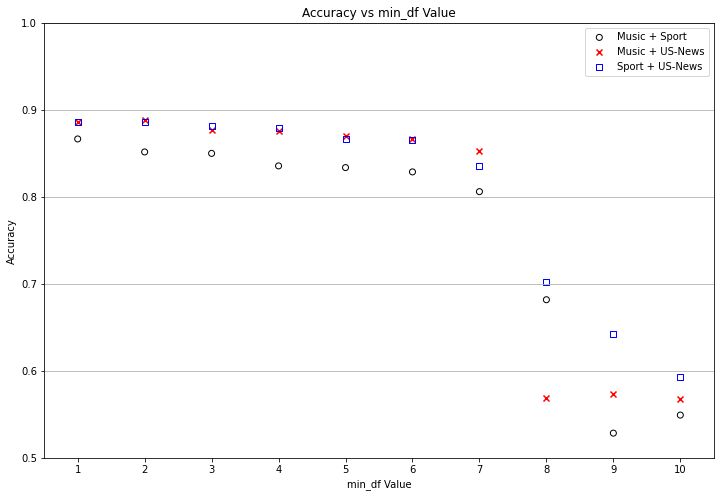

In [258]:
plt.figure(figsize=(12,8));
xAx=range(1,maxMin_df+1)
plt.scatter(xAx, accMS, marker="o", color="none", edgecolor="k", label="Music + Sport");
plt.scatter(xAx, accMU, marker="x", color="r", label="Music + US-News");
plt.scatter(xAx, accSU, marker="s", color="none",  edgecolor="b", label="Sport + US-News");
plt.legend()
plt.xlabel("min_df Value")
plt.ylabel("Accuracy")
plt.ylim([.5, 1])
plt.xlim([0.5, 10.5])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.grid(axis="y")
plt.title("Accuracy vs min_df Value");

We can see that the accuracy alone is highest for low values of min_df, however setting a value of 5 results in a very large reduction in size and will be chosen. The accuracy declines fast after reducing terms occuring less than 8 times, meaning that terms occuring less than 8 times contain valuable information.

The effect of not using stop words is briefly explored also, using min_df=5 and k=3

accsw=[]
accnsw=[]
accdif=[]

p1 = Pipeline([
    ('vec', CountVectorizer(min_df=5)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3))])
p2 = Pipeline([
    ('vec', CountVectorizer(stop_words="english", min_df=5)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3))])

accMS_nosw = cross_val_score(p1, dataMSSnips, dataMSCats, cv=10, scoring="accuracy")
accMS_sw = cross_val_score(p2, dataMSSnips, dataMSCats, cv=10, scoring="accuracy")
accsw.append(accMS_nosw.mean())
accnsw.append(accMS_nosw.mean())
accdif.append(accMS_nosw.mean()-accMS_nosw.mean())

accMU_nosw = cross_val_score(p1, dataMUSnips, dataMUCats, cv=10, scoring="accuracy")
accMU_sw = cross_val_score(p2, dataMUSnips, dataMUCats, cv=10, scoring="accuracy")
accsw.append(accMU_nosw.mean())
accnsw.append(accMU_nosw.mean())
accdif.append(accMU_nosw.mean()-accMU_nosw.mean())

accSU_nosw = cross_val_score(p1, dataSUSnips, dataSUCats, cv=10, scoring="accuracy")
accSU_sw = cross_val_score(p2, dataSUSnips, dataSUCats, cv=10, scoring="accuracy")
accsw.append(accSU_nosw.mean())
accnsw.append(accSU_nosw.mean())
accdif.append(accSU_nosw.mean()-accSU_nosw.mean())

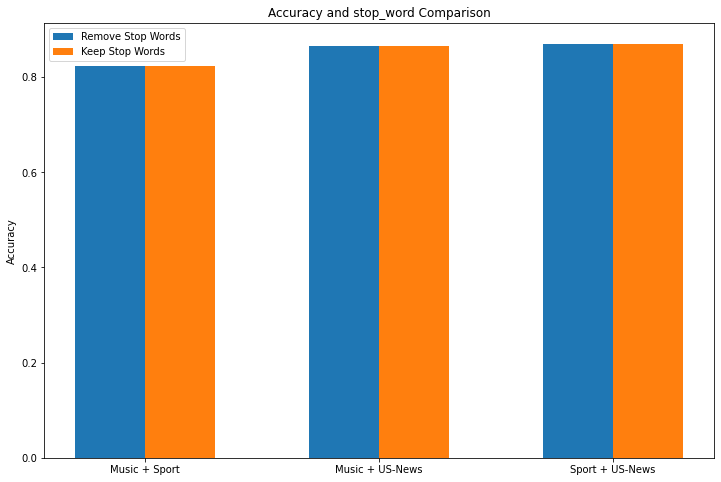

In [292]:
plt.figure(figsize=(12,8))
w=0.3
xlabels=["Music + Sport", "Music + US-News", "Sport + US-News"]
x=np.arange(len(xlabels))
plt.bar(x-w/2, accsw, w, label="Remove Stop Words")
plt.bar(x+w/2, accnsw, w, label="Keep Stop Words")
plt.xticks(x,xlabels);
plt.ylabel("Accuracy")
plt.title("Accuracy and stop_word Comparison")
plt.legend();

There is practically no difference with accuracy and the use of stop words on these data sets. The default English stop words will be removed.

The effect of the number of nearest neighbours will now be explored with min_df=5. An estimate for the expected value of k is often near the square root of the total number of elements.

In [320]:
# Setup pipeline
kMax=100
accMS=[]
accMU=[]
accSU=[]
for i in range(5,kMax+1,5):
    p = Pipeline([
        ('vec', CountVectorizer(stop_words="english", min_df=5)),
        ('tfidf', TfidfTransformer()),
        ('clf', KNeighborsClassifier(n_neighbors=i))])
    
    accMS_ = cross_val_score(p, dataMSSnips, dataMSCats, cv=10, scoring="accuracy")
    accMS.append(accMS_.mean())
    
    accMU_ = cross_val_score(p, dataMUSnips, dataMUCats, cv=10, scoring="accuracy")
    accMU.append(accMU_.mean())
    
    accSU_ = cross_val_score(p, dataSUSnips, dataSUCats, cv=10, scoring="accuracy")
    accSU.append(accSU_.mean())

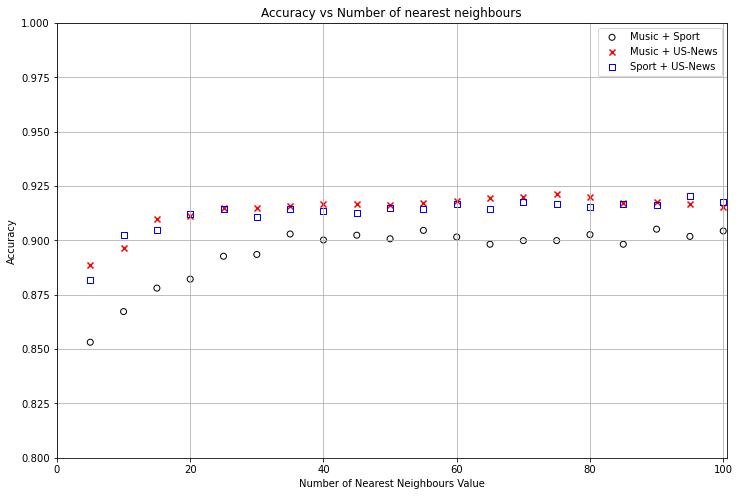

In [327]:
plt.figure(figsize=(12,8));
xAx=range(5,kMax+1,5)
plt.scatter(xAx, accMS, marker="o", color="none", edgecolor="k", label="Music + Sport");
plt.scatter(xAx, accMU, marker="x", color="r", label="Music + US-News");
plt.scatter(xAx, accSU, marker="s", color="none",  edgecolor="b", label="Sport + US-News");
plt.legend()
plt.xlabel("Number of Nearest Neighbours Value")
plt.ylabel("Accuracy")
plt.ylim([.8, 1])
plt.xlim([0.5, kMax+.5])
plt.xticks([0,20,40,60,80,100])
plt.grid()
plt.title("Accuracy vs Number of nearest neighbours");

In [340]:
X=accMS.index(max(accMS))*5
Y=accMU.index(max(accMU))*5
Z=accSU.index(max(accSU))*5
print(f"The highest accuracy is obtained from the number of nearest neighbours being {X} for Music and Sport, {Y} for Music and US-News, and {Z} for Sport and US-News.")
print(f"These result inaccuracies of {round(max(accMS)*100,2)}%, {round(max(accMU)*100,2)}%, {round(max(accSU)*100,2)}% respectively")

The highest accuracy is obtained from the number of nearest neighbours being 85 for Music and Sport, 70 for Music and US-News, and 90 for Sport and US-News.
These result inaccuracies of 90.51%, 92.11%, 92.05% respectively


Viewing the confusion matrices of these specific models will help in determining if the model is producing good outputs, i.e that it is not assigning to a majority class for example and ignoring one class entirely.

In [444]:
m_MS=KNeighborsClassifier(n_neighbors=85)
m_MU=KNeighborsClassifier(n_neighbors=70)
m_SU=KNeighborsClassifier(n_neighbors=90)

# Split data into 80 20 training test
MS_train_docs, MS_test_docs, MS_train_target, MS_test_target = train_test_split(dataMSSnips, dataMSCats, test_size=0.2)
MU_train_docs, MU_test_docs, MU_train_target, MU_test_target = train_test_split(dataMUSnips, dataMUCats, test_size=0.2)
SU_train_docs, SU_test_docs, SU_train_target, SU_test_target = train_test_split(dataSUSnips, dataSUCats, test_size=0.2)

# Get vector with stop words removed and min_df=5
vms= TfidfVectorizer(stop_words="english", min_df=5)
# Transform vector to fit training doc
XMS= vms.fit_transform(MS_train_docs)
# Preprocess test data the same way
XMS_test = vms.transform(MS_test_docs)
# Train the model with the training data and targets
m_MS.fit(XMS, MS_train_target)
# Predict test data
MS_predictions=m_MS.predict(XMS_test)
# Get confusion matrix
cm_MS = confusion_matrix(MS_test_target, MS_predictions, labels=["Music", "Sport"])
print("Music - Sport Confusion Matrix:")
print(cm_MS)

# Get vector with stop words removed and min_df=5
vmu= TfidfVectorizer(stop_words="english", min_df=5)
# Transform vector to fit training doc
XMU= vmu.fit_transform(MU_train_docs)
# Preprocess test data the same way
XMU_test = vmu.transform(MU_test_docs)
# Train the model with the training data and targets
m_MU.fit(XMU, MU_train_target)
# Predict test data
MU_predictions=m_MU.predict(XMU_test)
# Get confusion matrix
cm_MU = confusion_matrix(MU_test_target, MU_predictions, labels=["Music", "US-News"])
print("Music - US-News Confusion Matrix:")
print(cm_MU)

# Get vector with stop words removed and min_df=5
vsu= TfidfVectorizer(stop_words="english", min_df=5)
# Transform vector to fit training doc
XSU= vsu.fit_transform(SU_train_docs)
# Preprocess test data the same way
XSU_test = vsu.transform(SU_test_docs)
# Train the model with the training data and targets
m_SU.fit(XSU, SU_train_target)
# Predict test data
SU_predictions=m_SU.predict(XSU_test)
# Get confusion matrix
cm_SU = confusion_matrix(SU_test_target, SU_predictions, labels=["Sport", "US-News"])
print("Sport - US-News Confusion Matrix:")
print(cm_SU)

Music - Sport Confusion Matrix:
[[331  31]
 [ 33 329]]
Music - US-News Confusion Matrix:
[[325  29]
 [ 28 341]]
Sport - US-News Confusion Matrix:
[[321  33]
 [ 22 351]]


There are roughly as many type 1 errors as type 2 and predictions are not being made to any majority class as there is clearly no majority class present here. There is a low number of false negatives and false positives, with amounts reflecting the accuracy of our models

The achieved accuracy levels of 90.51%, 92.11%, and 92.05% show that these models are very good at discerning snippets of text pertaining to a specific category of text. The additional pre-processing and exploration has yielded an accuracy gain of over 10%

## Task 3
The steps undertaken for comparing all three categories is broadly similar 